In [1]:
import  json
from os import listdir
from os.path import isfile, join
import csv
import pandas as pd

In [2]:
import numpy as np

In [30]:
import matplotlib.pyplot as plt

Load the data from JSON

In [ ]:
data = json.load(open('rumoureval-subtaskA-train.json'))

dev = json.load(open('rumoureval-subtaskA-dev.json'))



Match the respective tweets by ID

In [ ]:
csv = open('traindata.csv', "w", encoding='utf-8-sig')
columnTitleRow = "ID,tweet_text,results\n"
csv.write(columnTitleRow)

for k,v in data.items():
    json_path=""
    mypath="C:/Users/Nicole/semeval2017-task8-dataset/rumoureval-data/"
    
    for d in listdir(mypath):
        for thread in listdir(mypath+d):
            if k == thread:
                json_path=mypath+d+"/"+thread+"/source-tweet/"+k+".json"
                break
            else:                
                reply_path=mypath+d+"/"+thread+"/replies/"
                if k+".json" in listdir(reply_path):
                    json_path=reply_path+k+".json"
                    break
        if json_path!="":
            break
    if (isfile(json_path)):
            source = json.load(open(json_path, 'r'))
            print(json_path)
    else:
        print ("False:" + k)
        print(json_path)
        print("end\n")
    #print (source)
    reply_tweet = source['text']
    reply_tweet = reply_tweet.replace("\n", " ")
    reply_tweet = reply_tweet.replace("\"", "\"\"")
    row = k + "," + "\"" + reply_tweet + "\"" + "," + v + "\n"
    csv.write(row)
    #print (source['text'])
    #print (v+"\n")
    

In [3]:
dataset = pd.read_csv('traindata.csv', error_bad_lines=False)

In [7]:
dataset.head()

,ID,tweet_text,results
0,501760642928635904,@max843 @DanteB4u @Alasscan_ This shows Micha...,comment
1,500270212198174720,@USATODAY Get ready to tweet the address #Spik...,comment
2,524971210275565568,@rikermacdaniels @CBCAlerts @CBCNews @JustinTr...,comment
3,552836882770690049,@RT_com Just kill them.,comment
4,500289931097296897,"@TheAnonMessage2 no, because that would requir...",support


In [8]:
csv.close()

AttributeError: module 'csv' has no attribute 'close'

Information of the training data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 3 columns):
ID             4238 non-null int64
 tweet_text    4238 non-null object
 results       4238 non-null object
dtypes: int64(1), object(2)
memory usage: 99.4+ KB


In [ ]:
dataset[dataset.isnull().any(axis=1)]

In [ ]:
np.sum(dataset.isnull().any(axis=1))

In [ ]:
dataset.isnull().any(axis=0)

In [18]:
dataset = dataset.rename(columns={" tweet_text": "tweet_text", " results": "results"})

the tweets of different classes

In [22]:
dataset['results'].value_counts()

comment    2734
support     841
deny        333
query       330
Name: results, dtype: int64

The data is skew, divide them into 4 groups based on the type

In [47]:
dfcomment = dataset[dataset.results == 'comment']

In [48]:
dfsupport = dataset[dataset.results == 'support']

In [49]:
dfdeny = dataset[dataset.results == 'deny']

In [25]:
dfquery = dataset[dataset.results == 'query']

In [27]:
dfquery.head()

,ID,tweet_text,results
14,525020658972258305,@ArmedResearch Which accounts?,query
19,553196346375954433,Does this cartoon means that hatred cartoons t...,query
30,544284034902528000,@Kiippyy @KEEMSTARx is there a live feed somew...,query
34,553589038196981760,@HuffingtonPost Can you confirm the reports th...,query
53,499456567990026240,@valeriehahn source?,query


we will need to oversample the 3 groups other than 'comment' group

# data cleansing

In [28]:
dataset['text_len'] = [len(t) for t in dataset.tweet_text]

In [29]:
dataset

,ID,tweet_text,results,text_len
0,501760642928635904,@max843 @DanteB4u @Alasscan_ This shows Micha...,comment,122
1,500270212198174720,@USATODAY Get ready to tweet the address #Spik...,comment,73
2,524971210275565568,@rikermacdaniels @CBCAlerts @CBCNews @JustinTr...,comment,134
3,552836882770690049,@RT_com Just kill them.,comment,24
4,500289931097296897,"@TheAnonMessage2 no, because that would requir...",support,136
5,544293230649810944,@Simon_Cullen @HalaJaber AU GOV and Tony Abbot...,comment,130
6,544283032732332032,@Kiippyy @KEEMSTARx u know theres some fucked ...,comment,92
7,500406679176241153,@jlpauk why would the ferguson PD and STLCO PD...,comment,113
8,500300182844878848,@140elect Here are pixs I have. http://t.co/jn...,comment,54
9,552811591683821568,@RT_com @SpringboroTea http://t.co/5NjSg1pBSi,comment,45


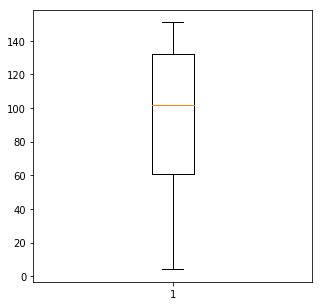

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(dataset.text_len)
plt.show()

In [33]:
testing = dataset[dataset['text_len']>140]

In [46]:
testing.head()

,ID,tweet_text,results,text_len
35,544452279441829888,@cnni @CNN @BreakingNewsKE O Lord @Gurmeetramr...,comment,143
43,500319394325479424,.@bucci2028 @orangeseahorse @Alasscan_ - Wils...,comment,144
55,499532946412687360,"@MichaelSkolnik when u spew racism,hate of us ...",comment,144
96,544530369312477184,@Joyce_Karam @LibyaLiberty No wonder dude uppe...,comment,144
115,525036307173879808,@MikeSavageHFX The @HfxRegPolice flags are al...,comment,142


tweet has length limit with 140, to see why they exceed 140

In [42]:
testing['tweet_text'].iloc[3]

'@Joyce_Karam @LibyaLiberty No wonder dude upped his game. Seems like men engaged in femicide &amp; sexual assaults in Australia can roam freely?'

# HTML decoding

In [43]:
from bs4 import BeautifulSoup

In [44]:
example1 = BeautifulSoup(testing['tweet_text'].iloc[3], 'html.parser')
example1.get_text()

'@Joyce_Karam @LibyaLiberty No wonder dude upped his game. Seems like men engaged in femicide & sexual assaults in Australia can roam freely?'